In [5]:
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tables
import aopy
import sklearn
from weights import *
from weights_linear_regression import calc_R2_with_sim_C
# so that we write in latex
from matplotlib import rc
import matplotlib.font_manager  # for ubuntu
import afs_plotting

from afs_plotting import subplots_with_labels

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
rc('text', usetex=False)

np.set_printoptions(precision=5, suppress=True)
sns.set_context('paper')

save_to_pickle = True
save_to_gdrive = True# this is done through the gdrive's mapping to the local file system
gdrive_directory = '/home/aolab/gdrive/Projects/Feature Selection/Figures/'
dpi_value = 300

## load the data

In [2]:
import pickle
# save all data used to generate the plot to a pickle file
ECoG_results_dir = '/home/aolab/sijia/adaptive_feature_selection/figure8_ecog/'



# load the data from the pickle file
with open(os.path.join(ECoG_results_dir, 'smoothness_array.pkl'), 'rb') as f:
    data_dict = pickle.load(f)

# unpack the data
active_set_all_lasso = data_dict['active_set_all_lasso']
active_set_all_smooth_convex = data_dict['active_set_all_smooth_convex']
r_squared_all_lasso = data_dict['r_squared_all_lasso']
r_squared_array = data_dict['r_squared_array']
smoothness_all_lasso = data_dict['smoothness_all_lasso']
smoothness_array = data_dict['smoothness_array']
convex_smoothness_array = data_dict['convex_smoothness_array']

Text(-0.1, 1.1, 'C')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

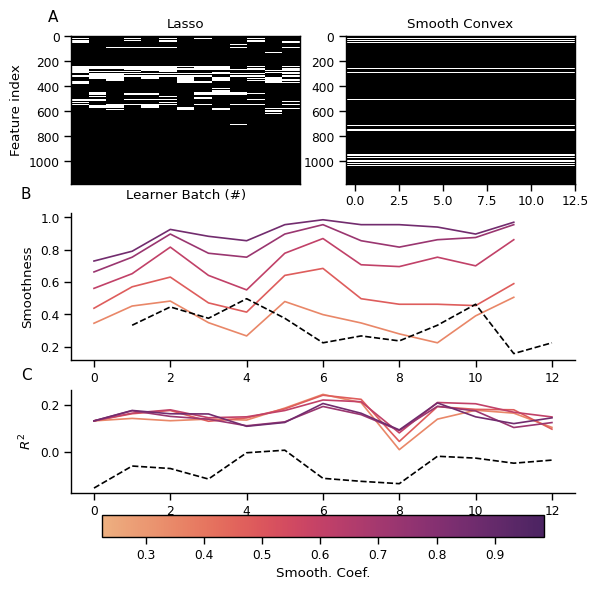

In [3]:

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6.5, 6.5 ))
gs = GridSpec(3, 2, figure=fig)

# first column
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
# second column
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, :])

# first column
afs_plotting.plot_feature_selection(active_set_all_lasso,
                                     ax=ax1)
afs_plotting.plot_feature_selection(active_set_all_smooth_convex, 
                                    ax=ax2)
ax1.set_xlabel("")
ax1.set_xticks([])
ax1.set_title("Lasso")
ax2.set_title("Smooth Convex")
ax1.set_xlabel("Learner Batch (#)")
ax2.set_xlabel("Learner Batch (#)")
# set ylabel to none
ax2.set_ylabel("")


# make some colorbar to show the smoothness
smoothness_array = np.asarray(smoothness_array)
colors = sns.color_palette("flare", len(smoothness_array))
norm = plt.Normalize(smoothness_array.min(), smoothness_array.max())
sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)


for i, s in enumerate(smoothness_array):
    ax3.plot(s, color=colors[i], label=f'Smoothness Coefficient = {convex_smoothness_array[i]}')

# ax3.plot( smoothness_array.T, '-o')
ax3.set_xlabel('Batch #')
ax3.set_ylabel('Smoothness')

ax3.plot(smoothness_all_lasso, "k--", label='Lasso')


for i, r in enumerate(r_squared_array):
    ax4.plot(r, color=colors[i], label=f'Smoothness Coefficient = {convex_smoothness_array[i]}')
ax4.plot(r_squared_all_lasso, 'k--')

ax4.set_ylabel(r'$R^2$')

cbar = fig.colorbar(sm, ax=ax4,
                 orientation='horizontal',

                 )
cbar.set_label('Smooth. Coef.')

# turn off the top and right spines
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# annotate the figures
# annotate this as figure A
ax1.text(-0.1, 1.1, "A", transform=ax1.transAxes, 
        size=11)

# annotate this as figure B
ax3.text(-0.1, 1.1, "B", transform=ax3.transAxes, 
        size=11)

# annotate this as figure C
ax4.text(-0.1, 1.1, "C", transform=ax4.transAxes, 
        size=11)


In [4]:
if save_to_gdrive:
    fig.savefig(gdrive_directory + 'figure6_smooth_ecog_feature_selection.pdf', dpi=dpi_value)
    fig.savefig(gdrive_directory + 'figure6_smooth_ecog_feature_selection.png', dpi=dpi_value)
    fig.savefig(gdrive_directory + 'figure6_smooth_ecog_feature_selection.svg', dpi=dpi_value)